The following is a heavily annotated and extended version of the introductory notebook from the ATLAS experiment's [open data notebooks](http://opendata.atlas.cern/release/2020/documentation/notebooks/intro.html)

The ATLAS most current open data can be browsed [here](http://opendata.atlas.cern/release/2020/documentation/datasets/files.html).  Brief descriptions of the variables are described in the [ATLAS open data note](http://opendata.atlas.cern/release/2020/documentation/datasets/dataset13.html)\*.

Some background on analysis topics with the ATLAS data sets: http://opendata.atlas.cern/books/current/get-started/_book/analyses.html

Direct link to ATLAS 2020 open data samples: https://atlas-opendata.web.cern.ch/atlas-opendata/samples/2020/

# A simple introductional notebook to HEP analysis in python
<p> In this notebook you can find an easy set of commands that show the basic computing techniques commonly used in high energy  physics (HEP) analyzes. It also shows how to create a histogram, fill it and draw it. Moreover it is an introduction to [ROOT](https://root.cern.ch/) too. At the end you get a plot with the number of leptons.</p>


<CENTER><h1>Simple pyROOT notebook example</h1></CENTER>

The library used is ROOT - a scientific software framework that provides all the functionalities needed to deal with big data processing, statistical analysis, visualisation and storage.

First of all ROOT is imported to read the files in the _.root_ data format. A _.root_ file consists of a tree having branches and leaves. At this point you could also import further programs that contain other formulas that you maybe use more often. But here we don't import other programs to keep it simple.

In [1]:
import ROOT as R

Welcome to JupyROOT 6.22/02


### The following analysis is searching for events where [Z bosons](https://en.wikipedia.org/wiki/W_and_Z_bosons) decay to two leptons of same flavour and opposite charge (to be seen for example in the [Feynman diagram](https://en.wikipedia.org/wiki/Feynman_diagram)).

<CENTER><img src="images/Z_ElectronPositron.png" style="width:30%"></CENTER>


### Definitions
**Derived data** sets are made by scanning the runs and collecting events that match some requirement, eg "has an electron an a position", "has a pair of photons", "looks like it might contain a top quark", etc.

**Simulated** or **Monte Carlo (MC)** data mimic the real data and are stored in identical formats.  It is possible to perform an analysis on MC data sets to determine how some real physics may look in the detector. Also MC is use to model known physical proceses, then data can be compared to these known processes to look for anomolies or signatures of new or rare particles or types of interactions.  

Next we have to open the data that we want to analyze. As described above the data is stored in a _*.root_ file.

Below we open an MC file with generated $Z\to e^+e^-$ events, so they should not be too hard to find!

In [2]:
## 8 TeV sample
#fMC = R.TFile.Open("http://opendata.atlas.cern/release/samples/MC/mc_105987.WZ.root") 
#fMC = R.TFile("/project/phys5630/opendata.cern/atlas/release/samples/MC/mc_105987.WZ.root") # local copy
# 13 TeV data
#fMC = R.TFile.Open("http://opendata.cern.ch/eos/opendata/atlas/OutreachDatasets/2020-01-22/2lep/MC/mc_361106.Zee.2lep.root")
fMC = R.TFile("/project/phys5630/opendata.cern/atlas-opendata/samples/2020/2lep/MC/mc_361106.Zee.2lep.root")

Let's look at the file we just opened.  We can see that it contains an object of type [TTree](https://root.cern.ch/doc/master/classTTree.html) named "mini".  

In [3]:
fMC.ls()

TFile**		/project/phys5630/opendata.cern/atlas-opendata/samples/2020/2lep/MC/mc_361106.Zee.2lep.root	
 TFile*		/project/phys5630/opendata.cern/atlas-opendata/samples/2020/2lep/MC/mc_361106.Zee.2lep.root	
  KEY: TTree	mini;1	mini


The TTree is a very flexible data container that is used to store event-based data in high energy physics.  The idea of an event is that each time a particle collision occurs, that's an event!  Each event has a data record, representing the signals measured in the detector.  And a TTree is a collection of data records.  Beams are collided for periods of time called **runs** and one or more data files may be used to hold the data from a run.

We can "fetch" objects from a ROOT TFile by name.  To fetch the TTree, use the TFile::Get method:

In [4]:
tree = fMC.Get("mini")
tree.Print()

******************************************************************************
*Tree    :mini      : mini                                                   *
*Entries : 21848524 : Total =     21539558986 bytes  File  Size = 4629800030 *
*        :          : Tree compression factor =   4.65                       *
******************************************************************************
*Br    0 :runNumber : runNumber/I                                            *
*Entries : 21848524 : Total  Size=   87409785 bytes  File Size  =     440648 *
*Baskets :      152 : Basket Size=    1921536 bytes  Compression= 198.19     *
*............................................................................*
*Br    1 :eventNumber : eventNumber/I                                        *
*Entries : 21848524 : Total  Size=   87410101 bytes  File Size  =   52755919 *
*Baskets :      152 : Basket Size=    1921536 bytes  Compression=   1.66     *
*...................................................

This tree contains ~80 "Branches" which can represent simple variables (floats, ints), composite objects like classes, arrays and vectors of these, etc.  The open data are deesigned to be easily accessible and use only simple data types and  arrays of these.  

In [5]:
print(tree.GetName(),"contains",tree.GetEntries(),"events")

mini contains 21848524 events


This tree is kind of big.  We'll start making plots with a subset of the events below.

In [6]:
maxevents = 100000  # use 0 for all events

After the data is opened we create a canvas on which we can draw a histogram. If we do not have a canvas we cannot see our histogram at the end. Its name is _Canvas_ and its header is _a first way to plot a variable_. The two following arguments define the width and the height of the canvas.

In [7]:
canvas = R.TCanvas("Canvas","a first way to plot a variable",800,600)

Now we define a histogram ([TH1F](https://root.cern.ch/doc/master/classTH1F.html))\* that will later be placed on this canvas. Its name is _variable_ and the header of the histogram is _Example plot: Number of leptons_. The three following arguments indicate that this histogram contains 4 so called bins which have a range from 0 to 4.

\*as with many ROOT classes, most of the documentation is part of the _base class_ description, that that is the [TH1](https://root.cern.ch/doc/master/classTH1.html) class.

In [8]:
h_lep_n = R.TH1F("variable","Example plot: Number of leptons; Number of leptons ; Events ",5,-0.5,4.5)

The following lines are a loop that goes over the data that is stored in the tree and fills the histogram that we already defined with the number of leptons found in each event.  In this first notebook we don't do any cuts to keep it simple. Accordingly the loop fills the histogram for each event stored in the tree. The variable _event_ provides an easy way to access all the variables in a given event.  We add a simple status counter below.

In [9]:
if maxevents>0: nstatus=maxevents/10
count=0

for event in tree:
    h_lep_n.Fill(event.lep_n)
    count=count+1
    if count%nstatus==0: print(count)
    if count>=maxevents: break 

10000
20000
30000
40000
50000
60000
70000
80000
90000
100000


There are a variety of ways to access the data in TTrees.  And the above method, which is similar to how this is done in compiled C++ code is rather inefficient in Python.  
<center><h2>Python loops are slow!</h2></center>
It is possible to map the TTree on to a set of numpy vectors, or a pandas data frame, or other objects optimized for use in Python.  Doing this effectively hides the loops from the Python code behind an interface that calls precompiled code.  That's OK for today.  Rather than introduce a potentially more abstract style of programming, we'll do this the old fashioned way in an attempt to make all of the operations as clear as possible.  

After filling the histogram we want to see the results of the analysis. First we draw the histogram on the canvas and then the canvas on which the histogram lies.

In [10]:
h_lep_n.SetFillColor(R.kRed)
h_lep_n.Draw()

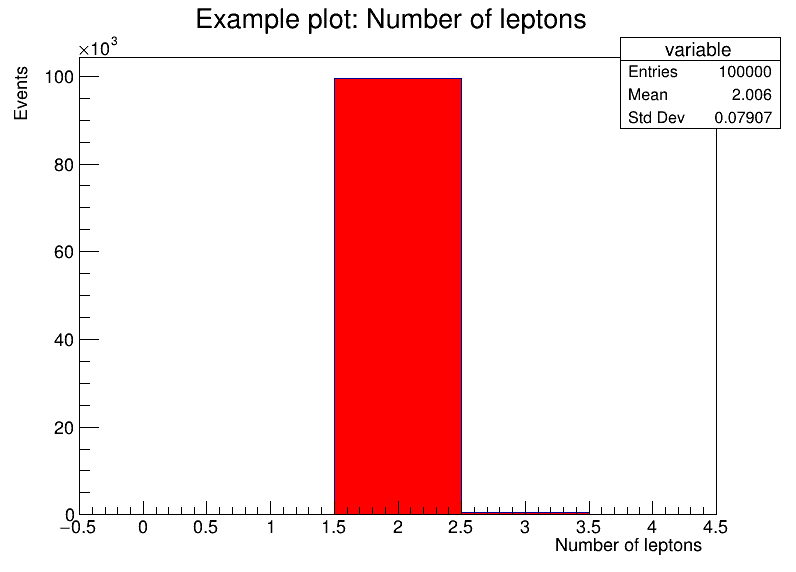

In [11]:
canvas.Draw()

The next cell will rescale the histogram to one (1).
This will allow to see proportions in the histogram itself.
**This is called normalization**

In [12]:
scale = h_lep_n.Integral()
h_lep_n.Scale(1/scale)
h_lep_n.SetFillColor(2)

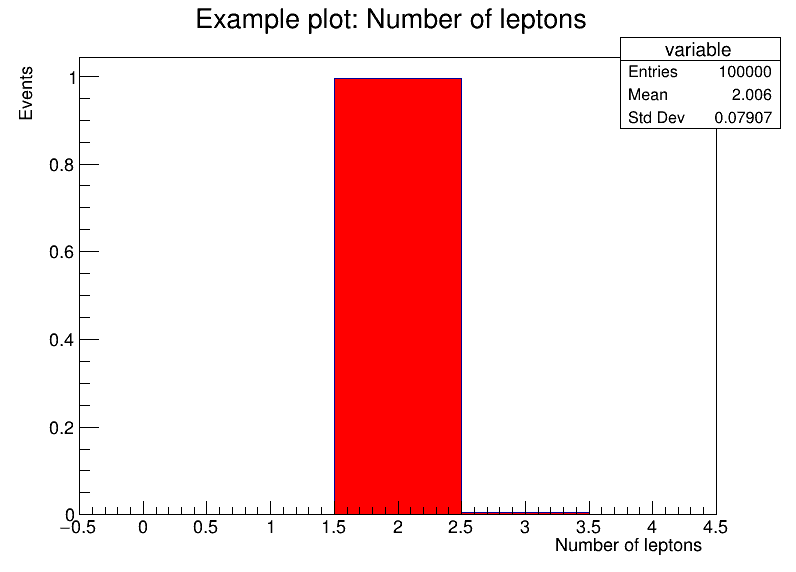

In [13]:
# ROOT feature: because we scaled the histogram, it will default to a drawing points with error bars
# below we force the drawing to remain in the histogram/barchart style
h_lep_n.Draw("hist")  
canvas.Draw()

Great, but that's pretty unexciting.  We are looking at MC that is full of only $Z\to ee$ events, so it's not surprising that almost all the events have ~2 leptons!   It is interesting that the RECONSTRUCTION of the SIMULATED data occasionally finds a third lepton.  This may or may not be a _good_ or _real_ lepton.   It could be an energy deposit from a charged hardron that was mistakenly identified by the electron or muon finding algorithm (both a leptons after all!).  Or it may be that a muon or electron was produced in some jet that accompanied the $Z$.  May it's a $\tau$ or even a jet that fakes a $\tau$.  Moral: you can't blindly trust any subatomic particle. :^)

**Wait, what?** Didn't I tell you that this was an MC sample with only $Z\to ee$?  Reality check: that almost never happens.  The protons that collide a bag of partons, so even if the most simple (or many possible) processes produced the $Z$, there's a good change some other quark(s)/gluon(s) got kicked out and made a jet(s).

Here are some examples of what real $Z\to 2\,{\rm{lepton}}$ candidates might look like.  
* https://cds.cern.ch/record/2019370?ln=en
* https://cds.cern.ch/record/1696939?ln=en

## Let's explore the file some more

For basic explorations, we'll use the [Draw](https://root.cern.ch/doc/master/classTTree.html#a73450649dc6e54b5b94516c468523e45) feature of the TTree.  This can be used to automatically generate histogram from branches and even apply selection criteria on which events are included in the histogram.  <br>
```	Draw (const char *varexp, const TCut &selection, Option_t *option="", Long64_t nentries=kMaxEntries, Long64_t firstentry=0)```
<br>
See the examples that follow.  For very complicated calculations involving different variables in the event, we will will normally have to resort to an explicit loop over the events (C++ style) or strictly apply "vector/columnwise programming" techniques in Python with a few tricks.  By using the Draw method of the TTree, we will also "hide" the loop and be rewarded with better performance.  In it's most simple invocation, TTree::Draw will automatically define the bins of the histogram, which is called _htemp_.  We can also exert more control, of course!

First, let's remake the plot above.  

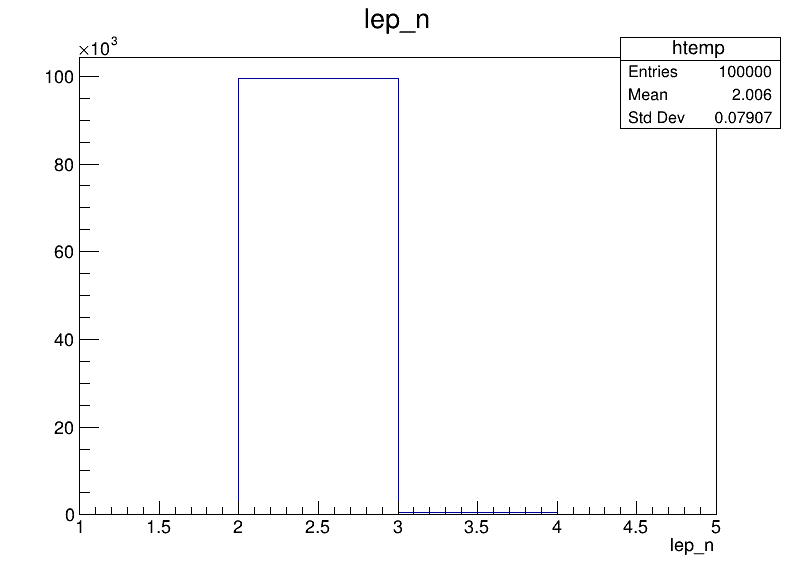

In [14]:
tree.Draw("lep_n","","",maxevents)
canvas.Draw()

Let's look more closely at those leptons

In [15]:
tree.Print("lep*")

******************************************************************************
*Tree    :mini      : mini                                                   *
*Entries : 21848524 : Total =     21539558986 bytes  File  Size = 4629800030 *
*        :          : Tree compression factor =   4.65                       *
******************************************************************************
*Br    0 :lep_n     : lep_n/i                                                *
*Entries : 21848524 : Total  Size=   87409153 bytes  File Size  =     947219 *
*Baskets :      152 : Basket Size=    1921536 bytes  Compression=  92.20     *
*............................................................................*
*Br    1 :lep_truthMatched : vector<bool>                                    *
*Entries : 21848524 : Total  Size=  349726412 bytes  File Size  =   38843281 *
*Baskets :      152 : Basket Size=    3070464 bytes  Compression=   9.00     *
*...................................................

So what are those leptons?

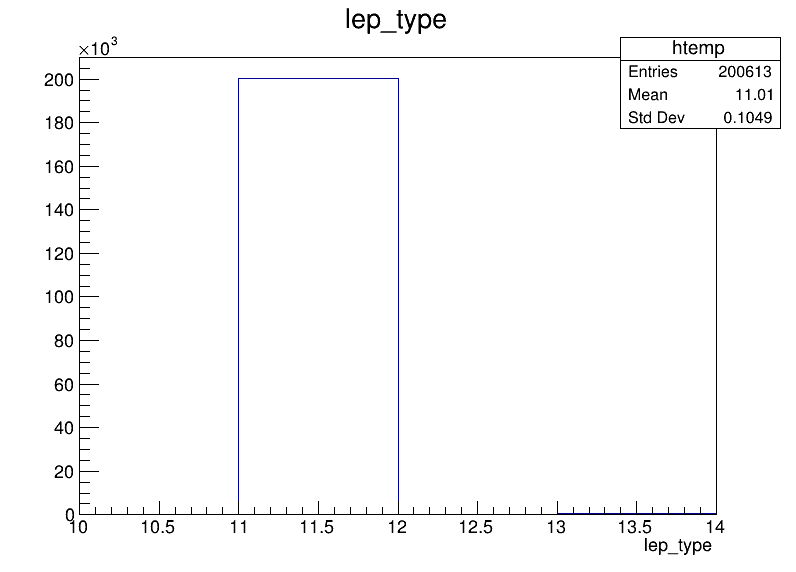

In [16]:
tree.Draw("lep_type","","",maxevents)
canvas.Draw()

### Lepton types
* 11: electron
* 12: muon
* 13: tau
* charge: -1 for particle, +1 for antiparticle

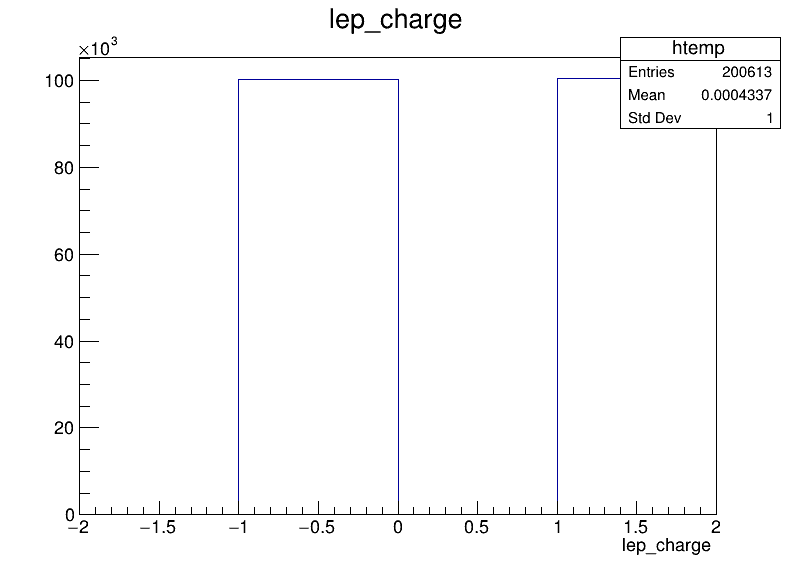

In [17]:
tree.Draw("lep_charge","","",maxevents)
canvas.Draw()
# ask about the "binning effect" if this next plot looks confusing

### Custom histograms with TTree::Draw
The example below shows how to set a custom histogram name and binning with TTree::Draw

created hq with 200613.0 entries


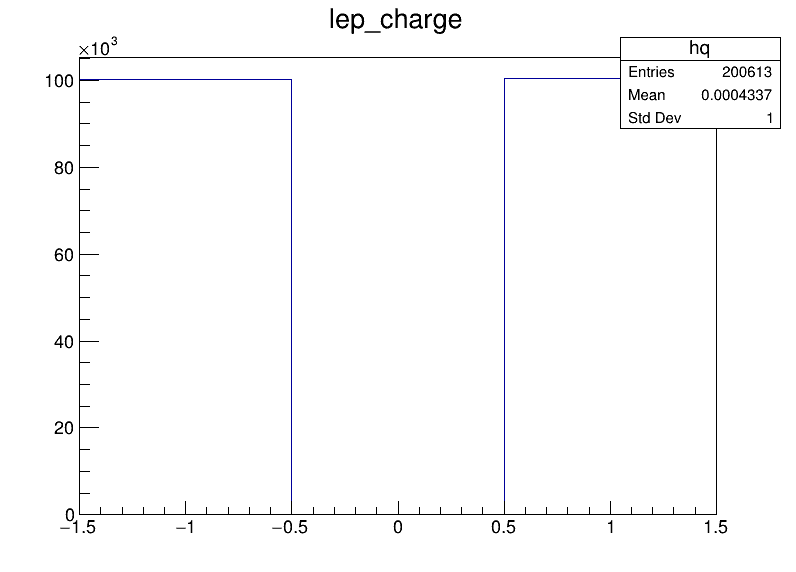

In [18]:
tree.Draw("lep_charge>>hq(3,-1.5,1.5)","","",maxevents)
print("created",R.hq.GetName(),"with",R.hq.GetEntries(),"entries")
canvas.Draw()

In 100,000 events, we found 200613 leptons. That's not surprising b/c we expect >= 2 per event.  Inefficiencies can cause the reconstruction algorithms to find fewer, but that appears not to be a factor here OR maybe the data file already had some selections applied to the events that were saved. 

### Warning: ROOT feature

When we specity the number of bins in the above histogram ```"lep_charge>>hq(3,-1.5,1.5)"``` that sets the default number of bins to 3 in all subsequent _automatically generated histograms_, unless we specify a different number of bins!  :-/


### Let's look at where the electrons are going and then some other parameters.
Recall the definitions of angles in our cylindrical coordinate system:
<CENTER><img src="images/coordinates.png" style="width:30%"></CENTER>

Below we will plot the eta distributions for electrons only.  This will use the selection feature of TTree::Draw.

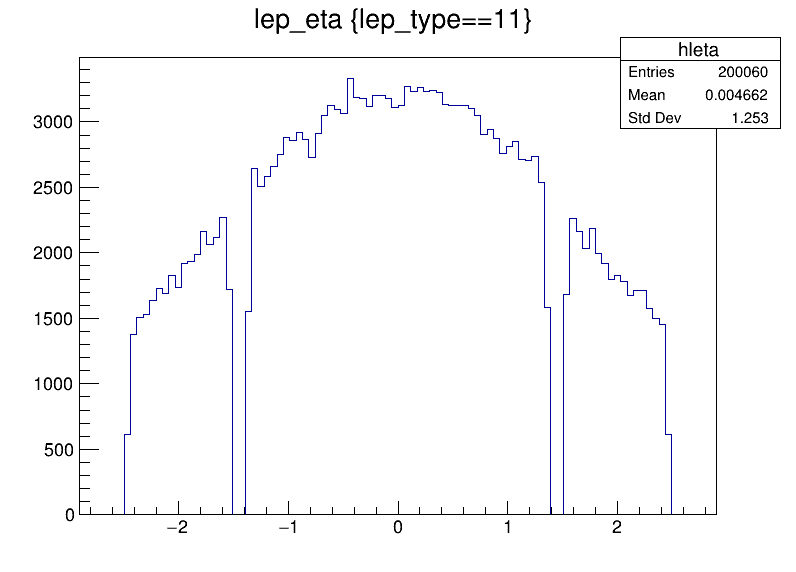

In [19]:
tree.Draw("lep_eta>>hleta(100)","lep_type==11","",maxevents) # name histogram here, but let ROOT figure out the binning
canvas.Draw()

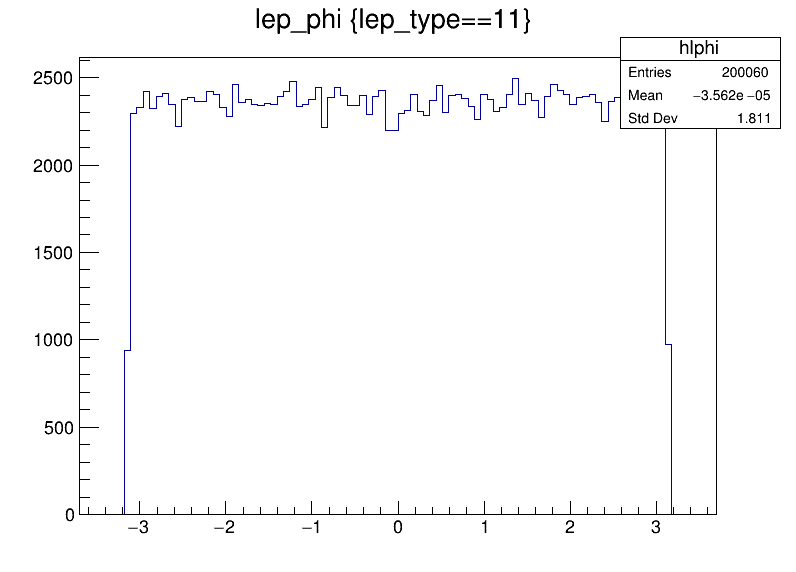

In [20]:
tree.Draw("lep_phi>>hlphi","lep_type==11","",maxevents) 
canvas.Draw()

### Jets anyone?

In [21]:
tree.Print("jet*")

******************************************************************************
*Tree    :mini      : mini                                                   *
*Entries : 21848524 : Total =     21539558986 bytes  File  Size = 4629800030 *
*        :          : Tree compression factor =   4.65                       *
******************************************************************************
*Br    0 :jet_n     : jet_n/i                                                *
*Entries : 21848524 : Total  Size=   87409153 bytes  File Size  =   11523007 *
*Baskets :      152 : Basket Size=    1921536 bytes  Compression=   7.58     *
*............................................................................*
*Br    1 :jet_pt    : vector<float>                                          *
*Entries : 21848524 : Total  Size=  354792919 bytes  File Size  =  114052959 *
*Baskets :      152 : Basket Size=    3070464 bytes  Compression=   3.11     *
*...................................................

We will now plot the _transverse momentum_ of the jets $p_T = \sqrt{p_x^2+p_y^2}$.  In general we will find exponentially falling distributions when plotting over a range of momentum/energy.  Higher energy phenomena correspond to collisions with greater impact (momentum exchange $Q^2$).  The cross sections typically fall exponentially with $Q^2$.  Units below are in MeV for energy and $p_T$.  Why doesn't ATLAS use GeV units like normal people?

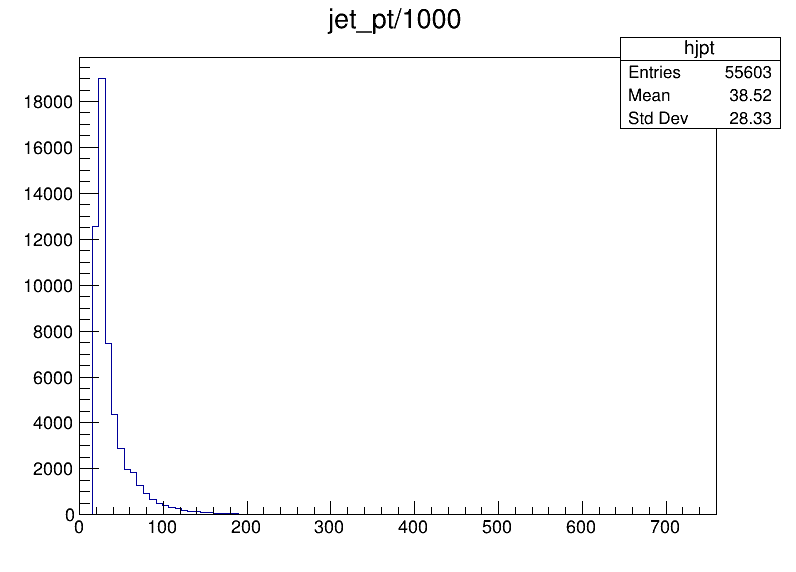

In [22]:
tree.Draw("jet_pt/1000>>hjpt","","",maxevents) # divided by 1000 to convert to GeV
canvas.Draw()

Why did ROOT choose that binning?  See below.  

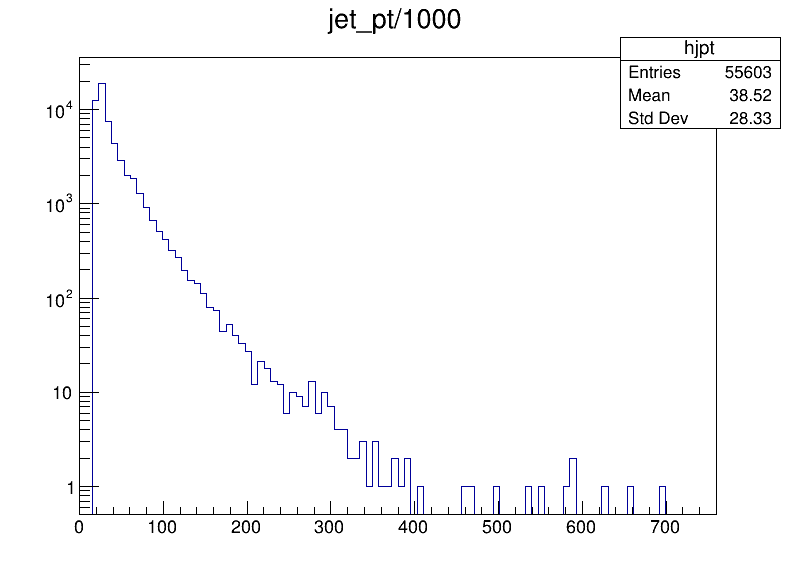

In [23]:
canvas.cd().SetLogy()  # turn on log scale
canvas.Draw()          # and redraw the canvas

Let's make an overlay

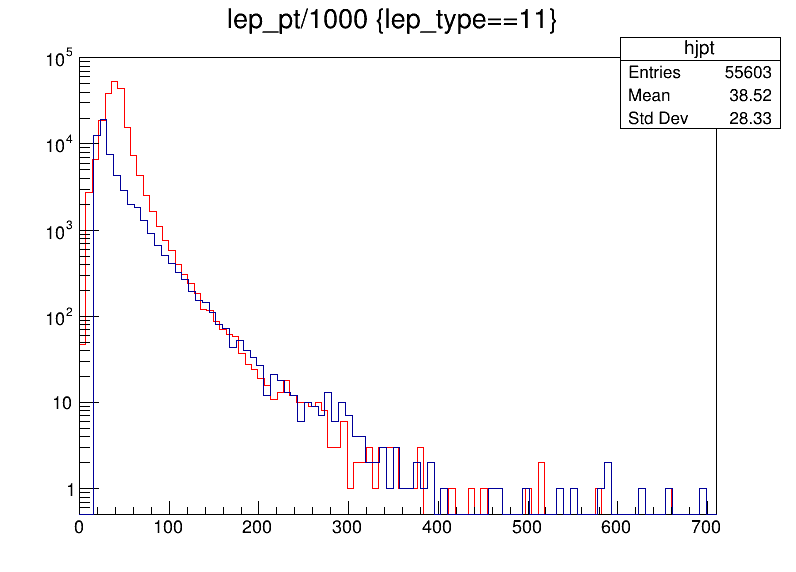

In [24]:
tree.Draw("lep_pt/1000>>hlpt","lep_type==11","",maxevents) 
R.hlpt.SetLineColor(R.kRed)
R.hjpt.Draw("same")
canvas.Draw()

In [25]:
canvas.cd().SetLogy(0)  # turn off log scale

### Looking at individual entries in an array
Examining the list of variables in the tree, you can see that some of them are designated as single integer/i or float/f, while others are vector<float> type, etc.  If we have a couple of lepton or jets, we will other want to look at the separately.  These variables can be accessed by index.

Note: when objects like leptons or jets are stored in an array, they are ordered from high to low $p_T$.  Units of $p_T$ and energy are MeV in the ATLAS data trees.  

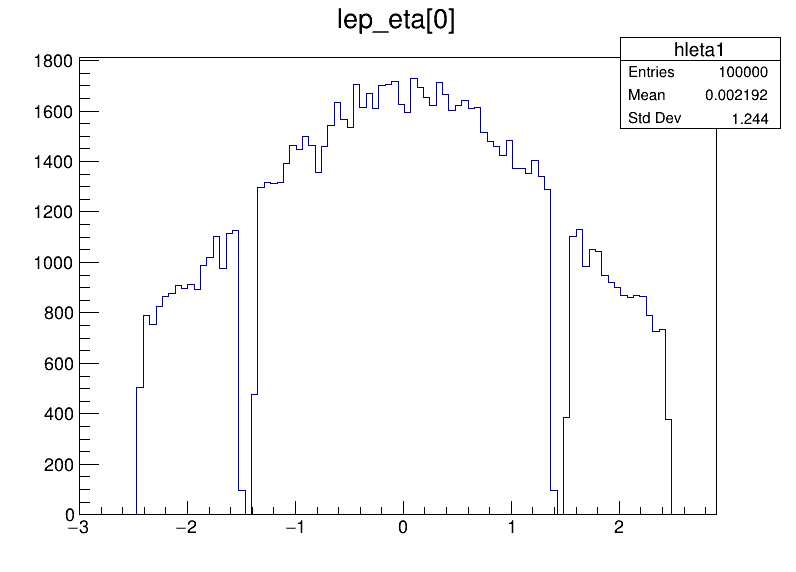

In [26]:
tree.Draw("lep_eta[0]>>hleta1","","",maxevents)  # plot on the "1st" lepton
canvas.Draw()

### Building up data selections
The selection strings can get kind of messy in the Draw method.  Here we'll define a series of selections or _cuts_ and use logical combinations of these with Draw.  This makes it much easier to keep track of your cuts and to change them globally lke any variable.

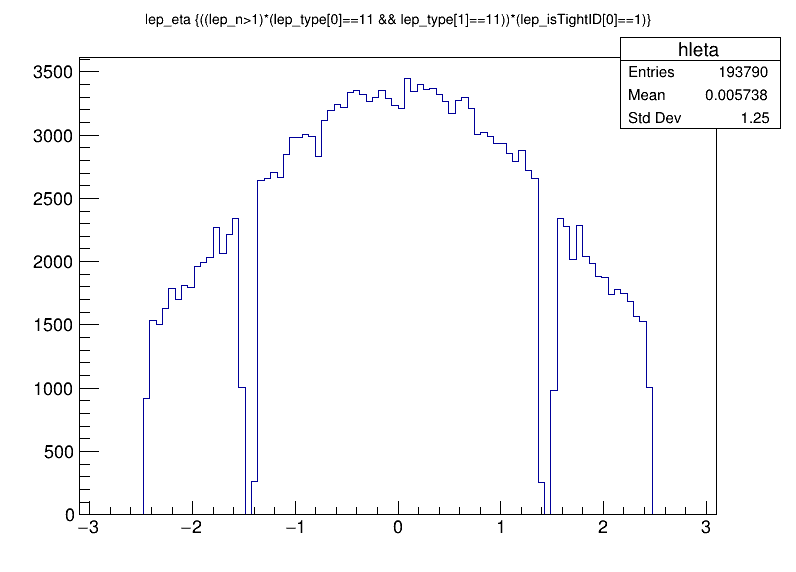

In [27]:
nlCut= R.TCut("lep_n>1")                             # at least two leptons
elCut= R.TCut("lep_type[0]==11 && lep_type[1]==11")  # require 'leading' leptons are electrons
idCut= R.TCut("lep_isTightID[0]==1")                 # ID algorithm has high confidence this is a lepton
evtSel=nlCut*elCut*idCut
R.hleta.Clear()   # feature alert: minor point, but the Clear is used to reset the title string of this old TF1
tree.Draw("lep_eta>>hleta",evtSel,"",maxevents)
canvas.Draw()

Let's clean up the title and labels

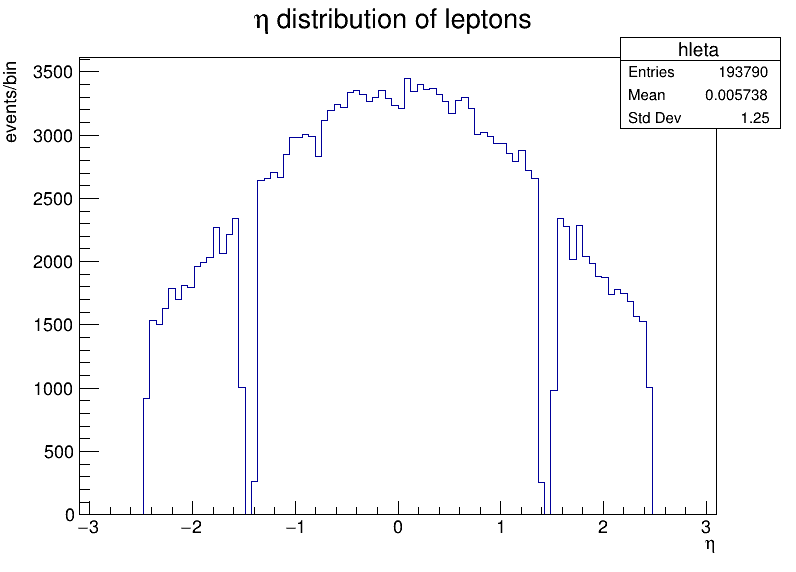

In [28]:
R.hleta.SetTitle("#eta distribution of leptons;#eta;events/bin") # notice how we make Greek letters
R.hleta.Draw()
canvas.Draw()

### Where are my Z's?
Now we will do some more analysis, by looping over the tree and reconstructing the $Z$ bosons from the observed leptons.  We will do this by creating 4-vectors for the leptons and the adding them to make a $Z$ candidate.  Of course any random pair of leptons do not a $Z$ make.  But this is MC, a universe we control!  

We will be responsible for applying cuts in the event loop now.  Also we will need to create hisogram(s) beofre we begin looping.  So the general analysis sequence is:
* create histograms for quantities of interest, then in the loop
* apply event selections
* calculate your physics quantities for passing events
* add these to your histograms

In [29]:
hmZ = R.TH1F("hmZ","Mass of the Z boson; mass [GeV]; events",60,40,140)

# for use in the loop
leadLepton  = R.TLorentzVector()
trailLepton = R.TLorentzVector()
zcand  = R.TLorentzVector()

In [30]:
# in case we run this multipl times, we'll start by restting the histogram, so we don't add events twice!
hmZ.Reset()

if maxevents<=0: maxevents=tree.GetEntriesFast()  # scan them all!
nstatus=maxevents/10

count=0

for event in tree:   
    # Cut #1: At least 2 leptons
    if event.lep_n >= 2:
        
        # Cut #2: Leptons with opposite charge
        if (event.lep_charge[0] != event.lep_charge[1]):
            
            # Cut #3: Leptons of the same family (2 electrons or 2 muons)
            if (event.lep_type[0] == event.lep_type[1]):
                
                # Let's define one TLorentz vector for each, e.i. two vectors!
                leadLepton.SetPtEtaPhiE(event.lep_pt[0]/1000, event.lep_eta[0], event.lep_phi[0], event.lep_E[0]/1000)
                trailLepton.SetPtEtaPhiE(event.lep_pt[1]/1000, event.lep_eta[1], event.lep_phi[1], event.lep_E[1]/1000)
                # Next line: addition of two TLorentz vectors above
                zcand = leadLepton + trailLepton   # Z candidate
                
                hmZ.Fill(zcand.M())
    count=count+1
    if count%nstatus==0: print(count)
    if count>=maxevents: break 

10000
20000
30000
40000
50000
60000
70000
80000
90000
100000


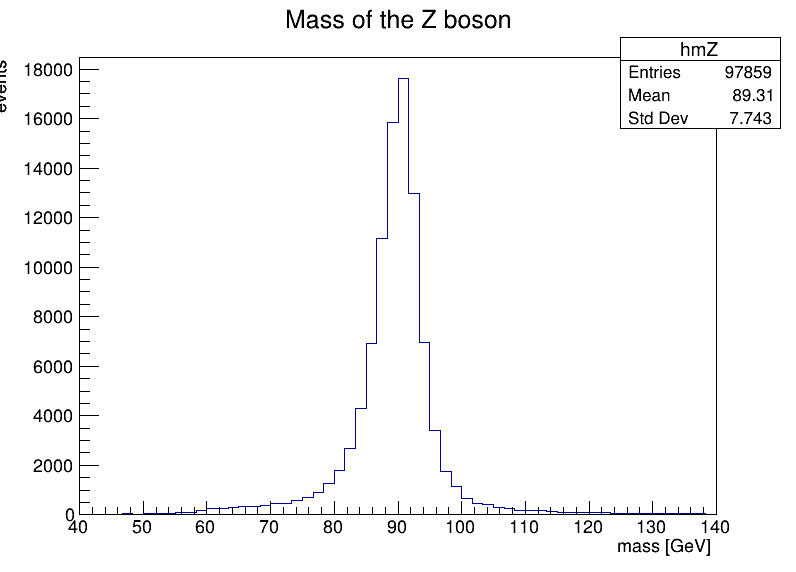

In [31]:
hmZ.Draw()
canvas.Draw()

Looks like there are indeed [$Z$ bosons](https://en.wikipedia.org/wiki/W_and_Z_bosons) here!  The mass peak is in the right place ~ 91 GeV.  Of cose these are all _real_ $Z$, because that what was generate int the MC!  There are two reasons why the $Z$ does not appear as a single narrow spike at $m_Z=91.1876\pm 0.0021$GeV:
1. The detecor resolution is not perfect.  When the momentum/energy of particles are measured there is some smearing.
2. The $Z$ is not a spike.  Particle masses have an intrinsic spread related their life time.  Short lifed particles like the $Z$ have small $\Delta t$, therefore large $\Delta E$ or "mass width". Blame quantum mechanics and [Heisenburg](https://simple.wikipedia.org/wiki/Heisenberg%27s_uncertainty_principle)!  $$\Delta x\Delta p \gtrsim h\\ \Delta E\Delta t \gtrsim h$$ 

### Get fit!
Histograms in ROOT a powerful analysis tools.  Now we will estimate the location of the peak of our distribuion to determin the $Z$ mass by fitting a Gaussian to the area around the peak.  In this case a Gaussian is a reasonable representation of the shape of the distribution, but real world problem get more involved. 

 FCN=2260.63 FROM MIGRAD    STATUS=CONVERGED      72 CALLS          73 TOTAL
                     EDM=1.26478e-09    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     1.53791e+04   7.36436e+01   1.23017e+00  -9.58494e-08
   2  Mean         8.99070e+01   1.32654e-02   3.00950e-04  -3.62049e-03
   3  Sigma        3.66500e+00   1.28467e-02   1.92431e-05  -2.79096e-02


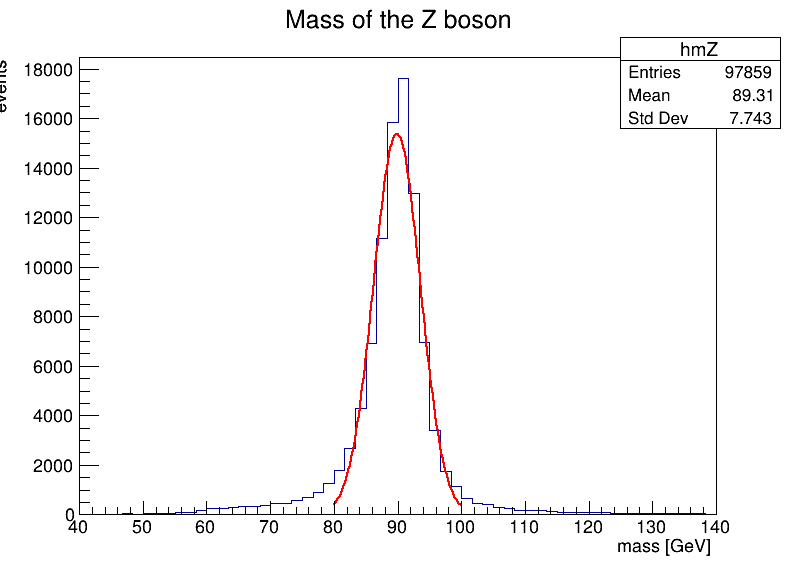

In [32]:
hmZ.Fit("gaus","","",80,100)
canvas.Draw()

Pretty good.  We are definitley observing a peak in the close vicinity of the $Z$.  In a more complete analysis, we would instead perform the fit using a more physically motivated functional form represented the shape of the mass distribution (Breit-Wigner) and combine this with information about the detector resolution, or use other statistical analysis methods combining the physics and detector modeling.

## Finally repeat our analsyis, doing more stuff!

In [33]:
from math import pi
recoil = R.TLorentzVector()
v4tmp  = R.TLorentzVector()

hptj1 = R.TH1F("hptj1","pT of leading jet;pT [GeV];events/bin",100,0,400)
hptj2 = R.TH1F("hptj2","pT of secondary jet;pT [GeV];events/bin",100,0,400)
hptallj = R.TH1F("hptallj","Sum pT of all jets (recoil);pT [GeV];events/bin",100,0,400)
hptZ = R.TH1F("hptZ","pT of Z;pT [GeV];events/bin",100,0,400)
hdphi = R.TH1F("hdphi","#Delta#phi(Z,recoil); events/bin",60,0,pi)

In [34]:
hmZ.Reset()
hptj1.Reset()
hptj2.Reset()
hptallj.Reset()
hptZ.Reset()
hdphi.Reset()

# rewritten below to remove some of the indentation
# notice that we reverse the cuts and use break statements

if maxevents<=0: maxevents=tree.GetEntriesFast()  # scan them all!
nstatus=maxevents/10
count=0

for event in tree:

    # Cut #1: At least 2 leptons
    if event.lep_n < 2: continue
    
    # Cut #2: Leptons with opposite charge
    if (event.lep_charge[0] == event.lep_charge[1]): continue
            
    # Cut #3: Leptons of the same family (2 electrons or 2 muons)
    if (event.lep_type[0] != event.lep_type[1]): continue
        
    # Let's define one TLorentz vector for each, e.i. two vectors!
    leadLepton.SetPtEtaPhiE(event.lep_pt[0]/1000, event.lep_eta[0], event.lep_phi[0], event.lep_E[0]/1000)
    trailLepton.SetPtEtaPhiE(event.lep_pt[1]/1000, event.lep_eta[1], event.lep_phi[1], event.lep_E[1]/1000)
    # Next line: addition of two TLorentz vectors above to get Z candidate
    zcand = leadLepton + trailLepton
    
    hmZ.Fill(zcand.M())

    # calculate the "Recoil" of the Z to be combination of all the jets in the event
    recoil=recoil*0  # zero out the recoil vector
    for i in range(event.jet_n):
        v4tmp.SetPtEtaPhiE(event.jet_pt[i]/1000, event.jet_eta[i], event.jet_phi[i], event.jet_E[i]/1000)
        recoil = recoil+v4tmp
        
    if event.jet_n>0: 
        hptj1.Fill(event.jet_pt[0]/1000)
        hptallj.Fill(recoil.Pt())
        if event.jet_n>1: hptj2.Fill(event.jet_pt[1]/1000)
        hdphi.Fill(zcand.DeltaPhi(recoil))
    
    hptZ.Fill(zcand.Pt())
    
    count=count+1
    if count%nstatus==0: print(count)
    if count>=maxevents: break 

10000
20000
30000
40000
50000
60000
70000
80000
90000
100000


In [35]:
c2=R.TCanvas()
c2.Divide(2,2)
#turn off statistics display
R.gStyle.SetOptStat(0)

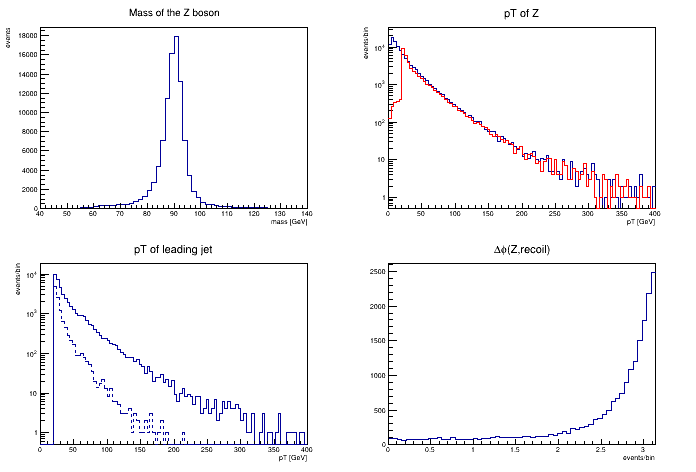

In [36]:
c2.cd(1)
hmZ.Draw()
c2.cd(2).SetLogy()
hptallj.SetLineColor(R.kRed)
hptZ.Draw()
hptallj.Draw("same")
c2.cd(3).SetLogy()
hptj1.Draw()
hptj2.SetLineStyle(2)
hptj2.Draw("same")
c2.cd(4)
hdphi.Draw()
c2.Draw()

Interesting stuff:
* $m_Z$ looks good as before
* Except for very low $p_T$ $Z$'s, $p_T^Z$ looks very much like the sum of the jets (recoil).  This is indeed expected.  But at very low $p_T$, the jets are not well collimated and difficult to identify.  In this case the recoil is a bunch of _unclustered energy_ deposits.  
* In fact we can see (3rd plot) that the jet algorithm doesn;t even try to find jets under 20 GeV.
* Finally we see that the $Z$ is back to back in the transverse plane with the recoil jet system.  Momentum conservation!  You can find a nice example of a $Z\to\mu\mu +3 jet$ event [here](https://cds.cern.ch/record/1696939?ln=en).  Notice how the muon pair from the decaying $Z$ balances the three jets.

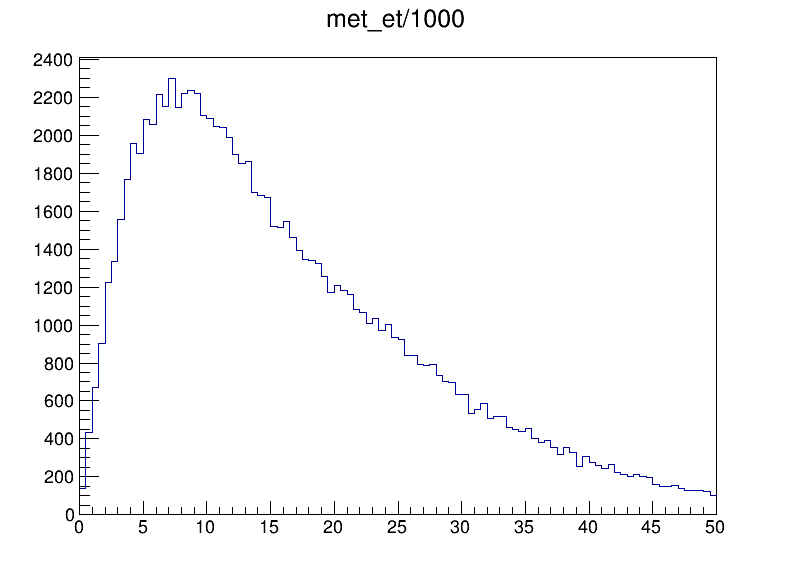

In [42]:
# quick look at "missing ET" or missing transverse momentum
# suggest plotting ratio of met to pt_Z above!
canvas.cd()
tree.Draw("met_et/1000>>met(100,0,50)","","",maxevents)
canvas.Draw()

# Project 1

You can access a data sample here: /project/phys5630/opendata.cern/atlas-opendata/samples/2020/2lep/Data/data_D.2lep.root

1. Perform a similar analysis as the one above using data
2. Make a comparison of your data and MC distributions.  You will need to normalize your histograms so their shapes can be more easily compared.
3. How does your data and MC agree?

10000
20000
30000
40000
50000
60000
70000
80000
90000
100000


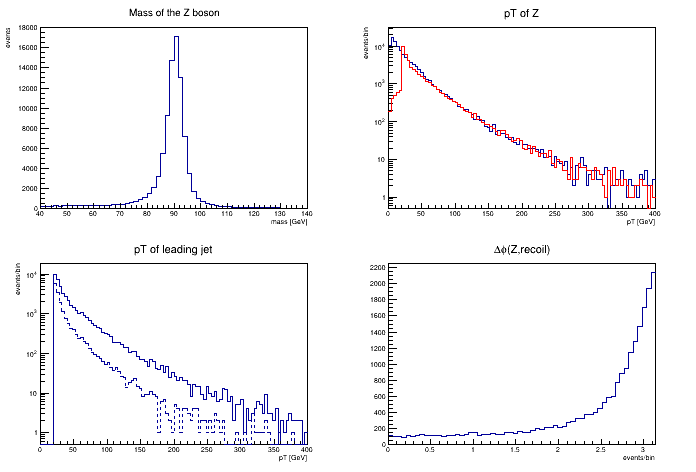

In [13]:
import ROOT as R
from math import pi

fMCproj1 = R.TFile("/project/phys5630/opendata.cern/atlas-opendata/samples/2020/2lep/Data/data_D.2lep.root")
tree = fMCproj1.Get("mini")
maxevents = 100000

recoil = R.TLorentzVector()
v4tmp  = R.TLorentzVector()

hmZ = R.TH1F("hmZ","Mass of the Z boson; mass [GeV]; events",60,40,140)

hptj1 = R.TH1F("hptj1","pT of leading jet;pT [GeV];events/bin",100,0,400)
hptj2 = R.TH1F("hptj2","pT of secondary jet;pT [GeV];events/bin",100,0,400)
hptallj = R.TH1F("hptallj","Sum pT of all jets (recoil);pT [GeV];events/bin",100,0,400)
hptZ = R.TH1F("hptZ","pT of Z;pT [GeV];events/bin",100,0,400)
hdphi = R.TH1F("hdphi","#Delta#phi(Z,recoil); events/bin",60,0,pi)

hmZ.Reset()
hptj1.Reset()
hptj2.Reset()
hptallj.Reset()
hptZ.Reset()
hdphi.Reset()

leadLepton  = R.TLorentzVector()
trailLepton = R.TLorentzVector()
zcand  = R.TLorentzVector()

# rewritten below to remove some of the indentation
# notice that we reverse the cuts and use break statements

if maxevents<=0: maxevents=tree.GetEntriesFast()  # scan them all!
nstatus=maxevents/10
count=0

for event in tree:
    # Cut #1: At least 2 leptons
    if event.lep_n < 2: continue
    
    # Cut #2: Leptons with opposite charge
    if (event.lep_charge[0] == event.lep_charge[1]): continue
            
    # Cut #3: Leptons of the same family (2 electrons or 2 muons)
    if (event.lep_type[0] != event.lep_type[1]): continue
        
    # Let's define one TLorentz vector for each, e.i. two vectors!
    leadLepton.SetPtEtaPhiE(event.lep_pt[0]/1000, event.lep_eta[0], event.lep_phi[0], event.lep_E[0]/1000)
    trailLepton.SetPtEtaPhiE(event.lep_pt[1]/1000, event.lep_eta[1], event.lep_phi[1], event.lep_E[1]/1000)
    # Next line: addition of two TLorentz vectors above to get Z candidate
    zcand = leadLepton + trailLepton

    hmZ.Fill(zcand.M())

    # calculate the "Recoil" of the Z to be combination of all the jets in the event
    recoil=recoil*0  # zero out the recoil vector
    for i in range(event.jet_n):
        v4tmp.SetPtEtaPhiE(event.jet_pt[i]/1000, event.jet_eta[i], event.jet_phi[i], event.jet_E[i]/1000)
        recoil = recoil+v4tmp
        
    if event.jet_n>0: 
        hptj1.Fill(event.jet_pt[0]/1000)
        hptallj.Fill(recoil.Pt())
        if event.jet_n>1: hptj2.Fill(event.jet_pt[1]/1000)
        hdphi.Fill(zcand.DeltaPhi(recoil))
    
    hptZ.Fill(zcand.Pt())
    
    count=count+1
    if count%nstatus==0: print(count)
    if count>=maxevents: break

c3=R.TCanvas()
c3.Divide(2,2)
#turn off statistics display
R.gStyle.SetOptStat(0)

c3.cd(1)
hmZ.Draw()
c3.cd(2).SetLogy()
hptallj.SetLineColor(R.kRed)
hptZ.Draw()
hptallj.Draw("same")
c3.cd(3).SetLogy()
hptj1.Draw()
hptj2.SetLineStyle(2)
hptj2.Draw("same")
c3.cd(4)
hdphi.Draw()
c3.Draw()


# Project 2

You can access another MC sample here: /project/phys5630/opendata.cern/atlas-opendata/samples/2020/4lep/MC/mc_363490.llll.4lep.root

This sample has event with 4 leptons.  Note: maybe they're not all electrons.  The process generated is as pictured below.

<CENTER><img src="images/ZZ2llll.png" style="width:30%"></CENTER>

Your job is to analyse this file and reconstruct and display the following quantities (at a minimum)!
You will have be careful about how you combine all those leptons to make your $Z's$ now.  

* $m_{Z1}$, $m_{Z2}$, where you can define $Z_1$ as the candidate having the largest $p_T$
* The mass distribution of the $Z$'s combined together.  
* Look again at the recoil of the $Z$ system and the jets in the event.
* Do you see any difference in the shape of the $Z$ peak depending on what kink of leptons are used to form the $Z$?

10000
20000
30000
40000
50000
60000
70000
80000
90000
100000


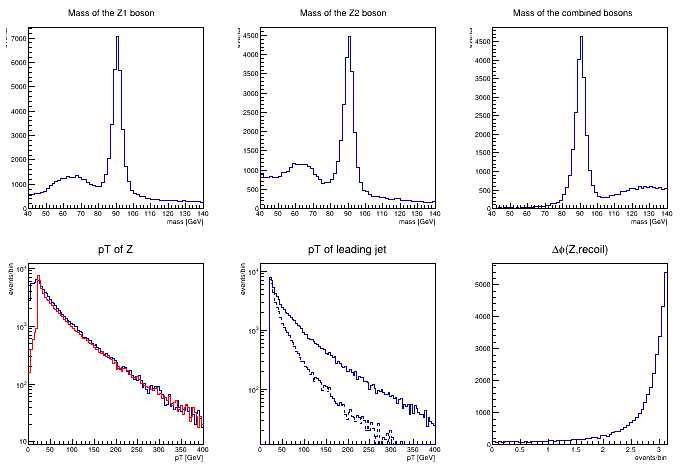

In [28]:
import ROOT as R
from math import pi

fMCproj1 = R.TFile("/project/phys5630/opendata.cern/atlas-opendata/samples/2020/4lep/MC/mc_363490.llll.4lep.root")
tree = fMCproj1.Get("mini")
maxevents = 100000

recoil = R.TLorentzVector()
v4tmp  = R.TLorentzVector()

hmZ1 = R.TH1F("hmZ1","Mass of the Z1 boson; mass [GeV]; events",60,40,140)
hmZ2 = R.TH1F("hmZ2","Mass of the Z2 boson; mass [GeV]; events",60,40,140)
hmZ3 = R.TH1F("hmZ3","Mass of the combined bosons; mass [GeV]; events",60,40,140)

hptj1 = R.TH1F("hptj1","pT of leading jet;pT [GeV];events/bin",100,0,400)
hptj2 = R.TH1F("hptj2","pT of secondary jet;pT [GeV];events/bin",100,0,400)
hptallj = R.TH1F("hptallj","Sum pT of all jets (recoil);pT [GeV];events/bin",100,0,400)
hptZ = R.TH1F("hptZ","pT of Z;pT [GeV];events/bin",100,0,400)
hdphi = R.TH1F("hdphi","#Delta#phi(Z,recoil); events/bin",60,0,pi)

hmZ1.Reset()
hmZ2.Reset()
hmZ3.Reset()
hptj1.Reset()
hptj2.Reset()
hptallj.Reset()
hptZ.Reset()
hdphi.Reset()

Lepton1  = R.TLorentzVector()
Lepton2 = R.TLorentzVector()
Lepton3  = R.TLorentzVector()
Lepton4 = R.TLorentzVector()
z1  = R.TLorentzVector()
z2  = R.TLorentzVector()
zcand  = R.TLorentzVector()

# rewritten below to remove some of the indentation
# notice that we reverse the cuts and use break statements

if maxevents<=0: maxevents=tree.GetEntriesFast()  # scan them all!
nstatus=maxevents/10
count=0

for event in tree:
    # Cut #1: At least 2 leptons
    if event.lep_n < 2: continue
    
    # Cut #2: Leptons with opposite charge
    if (event.lep_charge[0] == event.lep_charge[1]): continue
            
    # Cut #3: Leptons of the same family (2 electrons or 2 muons)
    if (event.lep_type[0] != event.lep_type[1]): continue
        
    # Let's define one TLorentz vector for each, e.i. two vectors!
    Lepton1.SetPtEtaPhiE(event.lep_pt[0]/1000, event.lep_eta[0], event.lep_phi[0], event.lep_E[0]/1000)
    Lepton2.SetPtEtaPhiE(event.lep_pt[1]/1000, event.lep_eta[1], event.lep_phi[1], event.lep_E[1]/1000)
    Lepton3.SetPtEtaPhiE(event.lep_pt[2]/1000, event.lep_eta[2], event.lep_phi[2], event.lep_E[2]/1000)
    Lepton4.SetPtEtaPhiE(event.lep_pt[3]/1000, event.lep_eta[3], event.lep_phi[3], event.lep_E[3]/1000)
    
    z1 = Lepton1 + Lepton2
    z2 = Lepton3 + Lepton4
    
    if(z1.Pt() > z2.Pt()):
        hmZ1.Fill(z1.M())
        hmZ2.Fill(z2.M())
    else:
        hmZ2.Fill(z1.M())
        hmZ1.Fill(z2.M())

    
    zcand = z1 + z2
    
    hmZ3.Fill(zcand.M())
    
    # calculate the "Recoil" of the Z to be combination of all the jets in the event
    recoil=recoil*0  # zero out the recoil vector
    for i in range(event.jet_n):
        v4tmp.SetPtEtaPhiE(event.jet_pt[i]/1000, event.jet_eta[i], event.jet_phi[i], event.jet_E[i]/1000)
        recoil = recoil+v4tmp
        
    if event.jet_n>0: 
        hptj1.Fill(event.jet_pt[0]/1000)
        hptallj.Fill(recoil.Pt())
        if event.jet_n>1: hptj2.Fill(event.jet_pt[1]/1000)
        hdphi.Fill(zcand.DeltaPhi(recoil))
    
    hptZ.Fill(zcand.Pt())
    
    count=count+1
    if count%nstatus==0: print(count)
    if count>=maxevents: break

        
        
        
        
c3=R.TCanvas()
c3.Divide(3,2)
#turn off statistics display
R.gStyle.SetOptStat(0)

c3.cd(1)
hmZ1.Draw()
c3.cd(2)
hmZ2.Draw()
c3.cd(3)
hmZ3.Draw()
c3.cd(4).SetLogy()
hptallj.SetLineColor(R.kRed)
hptZ.Draw()
hptallj.Draw("same")
c3.cd(5).SetLogy()
hptj1.Draw()
hptj2.SetLineStyle(2)
hptj2.Draw("same")
c3.cd(6)
hdphi.Draw()
c3.Draw()


# Project 3
Finally the following file siumlates the process $ZZ\to qq\ell\ell$, so one $Z$ decayes to a $q\bar q$ pair and the other to a pair of charged leptons.  

/project/phys5630/opendata.cern/atlas-opendata/samples/2020/2lep/MC/mc_363356.ZqqZll.2lep.root

Make some exploratory plots for this sample.  Discuss your findings.

10000
20000
30000
40000
50000
60000
70000
80000
90000
100000


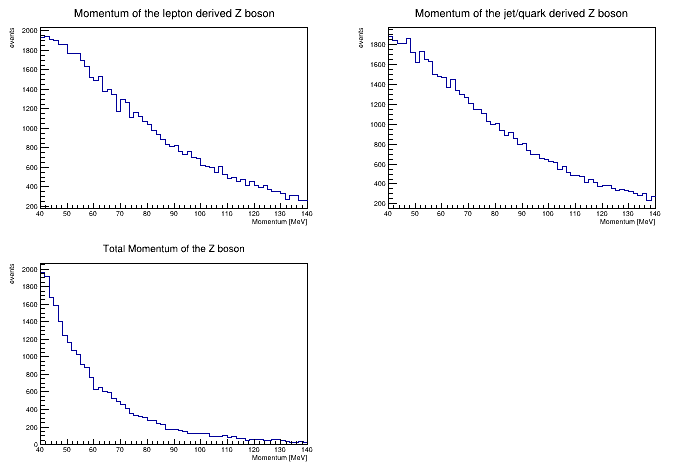

In [41]:
import ROOT as R
from math import pi

fMCproj1 = R.TFile("/project/phys5630/opendata.cern/atlas-opendata/samples/2020/2lep/MC/mc_363356.ZqqZll.2lep.root")
tree = fMCproj1.Get("mini")
maxevents = 100000


recoil = R.TLorentzVector()
v4tmp  = R.TLorentzVector()

hmZ1 = R.TH1F("hmZ1","Momentum of the lepton derived Z boson; Momentum [MeV]; events",60,40,140)
hmZ2 = R.TH1F("hmZ2","Momentum of the jet/quark derived Z boson; Momentum [MeV]; events",60,40,140)
hmZ3 = R.TH1F("hmZ3","Total Momentum of the Z boson; Momentum [MeV]; events",60,40,140)

hptj1 = R.TH1F("hptj1","pT of leading jet;pT [GeV];events/bin",100,0,400)
hptj2 = R.TH1F("hptj2","pT of secondary jet;pT [GeV];events/bin",100,0,400)
hptallj = R.TH1F("hptallj","Sum pT of all jets (recoil);pT [GeV];events/bin",100,0,400)
hptZ = R.TH1F("hptZ","pT of Z;pT [GeV];events/bin",100,0,400)
hdphi = R.TH1F("hdphi","#Delta#phi(Z,recoil); events/bin",60,0,pi)

hmZ1.Reset()
hmZ2.Reset()
hmZ3.Reset()
hptj1.Reset()
hptj2.Reset()
hptallj.Reset()
hptZ.Reset()
hdphi.Reset()

leadLepton  = R.TLorentzVector()
trailLepton = R.TLorentzVector()
zlep  = R.TLorentzVector()
zquark = R.TLorentzVector()

# rewritten below to remove some of the indentation
# notice that we reverse the cuts and use break statements

if maxevents<=0: maxevents=tree.GetEntriesFast()  # scan them all!
nstatus=maxevents/10
count=0

for event in tree:
    # Cut #1: At least 2 leptons
    if event.lep_n < 2: continue
    
    # Cut #2: Leptons with opposite charge
    if (event.lep_charge[0] == event.lep_charge[1]): continue
            
    # Cut #3: Leptons of the same family (2 electrons or 2 muons)
    if (event.lep_type[0] != event.lep_type[1]): continue
        
    # Let's define one TLorentz vector for each, e.i. two vectors!
    leadLepton.SetPtEtaPhiE(event.lep_pt[0]/1000, event.lep_eta[0], event.lep_phi[0], event.lep_E[0]/1000)
    trailLepton.SetPtEtaPhiE(event.lep_pt[1]/1000, event.lep_eta[1], event.lep_phi[1], event.lep_E[1]/1000)
    # Next line: addition of two TLorentz vectors above to get Z candidate
    zlep = leadLepton + trailLepton

    hmZ1.Fill(zlep.Pt())

    # calculate the "Recoil" of the Z to be combination of all the jets in the event
    recoil=recoil*0  # zero out the recoil vector
    for i in range(event.jet_n):
        v4tmp.SetPtEtaPhiE(event.jet_pt[i]/1000, event.jet_eta[i], event.jet_phi[i], event.jet_E[i]/1000)
        recoil = recoil+v4tmp
        
    if event.jet_n>0: 
        hptj1.Fill(event.jet_pt[0]/1000)
        hptallj.Fill(recoil.Pt())
        hmZ2.Fill(recoil.Pt())
        if event.jet_n>1: hptj2.Fill(event.jet_pt[1]/1000)
        hdphi.Fill(zcand.DeltaPhi(recoil))
    
    hptZ.Fill(zcand.Pt())
    zquark = recoil + zlep
    hmZ3.Fill(zquark.Pt())
    
    count=count+1
    if count%nstatus==0: print(count)
    if count>=maxevents: break
        
    

c3=R.TCanvas()
c3.Divide(2,2)
#turn off statistics display
R.gStyle.SetOptStat(0)

c3.cd(1)
hmZ1.Draw()
c3.cd(2)
hmZ2.Draw()
c3.cd(3)
hmZ3.Draw()
#c3.cd(2).SetLogy()
#hptallj.SetLineColor(R.kRed)
#hptZ.Draw()
#hptallj.Draw("same")
#c3.cd(3).SetLogy()
#hptj1.Draw()
#hptj2.SetLineStyle(2)
#hptj2.Draw("same")
#c3.cd(4)
#hdphi.Draw()
c3.Draw()


Findings: The differently generated bosons are of approximately the same energy for the same event. 